In [1]:
import nltk
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../scripts/')
from data_loader import read_csv_file

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
def normailze_date(news_df, stock_df):
    """
    Normalize dates in both datasets to ensure alignment.
    """
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
    news_df['date'].fillna(news_df['date'].min(), inplace=True)
    news_df['date'] = news_df['date'].dt.date
    stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
    return news_df, stock_df


In [3]:
def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

In [4]:
def calculate_daily_returns(df):
    df['Daily Returns'] = df['Close'].pct_change()
    return df

In [5]:
def aggrgate_daily_sentiment(df):
    daily_sentiment = df.groupby('date')['Sentiment'].mean().reset_index()
    return daily_sentiment


In [6]:
def calculate_correlation(stock_df, daily_sentiment):
    merged_df = pd.merge(stock_df,daily_sentiment,left_on='Date', right_on='date')
    correlation = merged_df['Daily Returns'].corr(merged_df['Sentiment'])
    return correlation

In [7]:
def visualize_correlation(stock_df, daily_sentiment): 
    """ Visualize the correlation between daily sentiment scores and stock returns. """ 
    merged_df = pd.merge(stock_df, daily_sentiment, left_on='Date', right_on='date')
    plt.figure(figsize=(14,7)) 
    plt.scatter(merged_df['Sentiment'], merged_df['Daily Returns']) 
    plt.title('Correlation between Daily Sentiment Scores and Stock Returns') 
    plt.xlabel('Daily Sentiment Scores') 
    plt.ylabel('Daily Returns')
    plt.show()

In [8]:
news_file = '../data/raw_analyst_ratings.csv'
stock_file =  '../data/TSLA_historical_data.csv'


In [9]:
news_df = read_csv_file(news_file)
stock_df = read_csv_file(stock_file)

In [10]:
news_df, stock_df = normailze_date(news_df,stock_df)
news_df.head()



C:\Users\pc\AppData\Local\Temp\ipykernel_3772\565975740.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_df['date'].fillna(news_df['date'].min(), inplace=True)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [11]:
news_df['Sentiment'] = news_df['headline'].apply(analyze_sentiment)

In [12]:
stock_df = calculate_daily_returns(stock_df)
daily_sentiment = aggrgate_daily_sentiment(news_df)

In [13]:
correlation = calculate_correlation(stock_df,daily_sentiment)


Pearson correlation coefficient: 0.05501737019119298


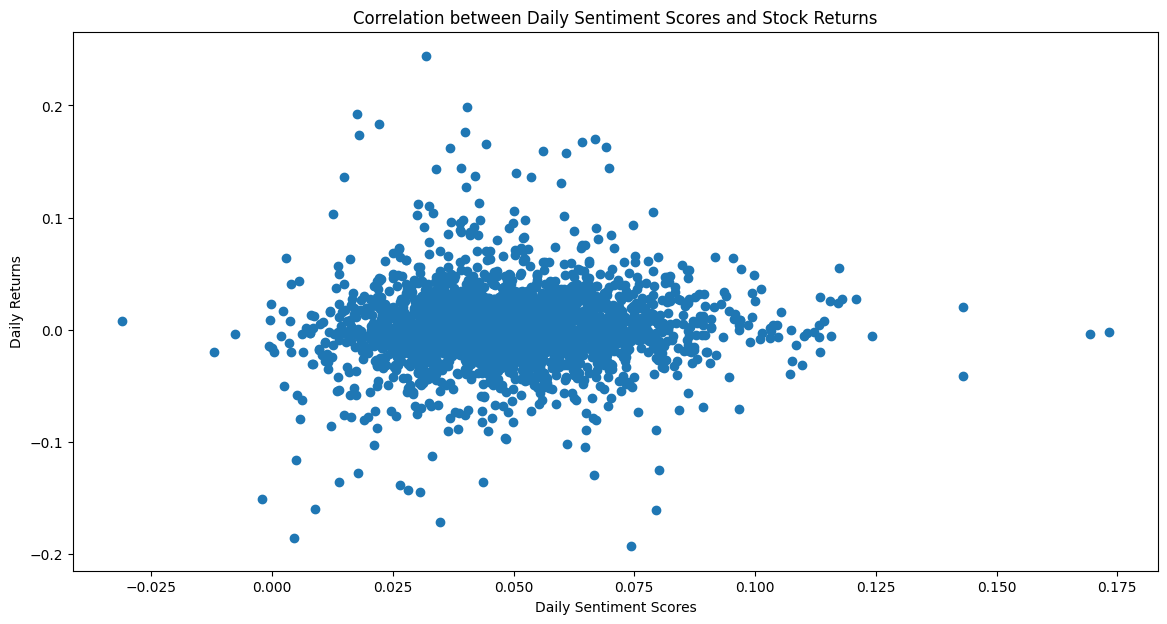

In [61]:
print(f"Pearson correlation coefficient: {correlation}")
visualize_correlation(stock_df,daily_sentiment)

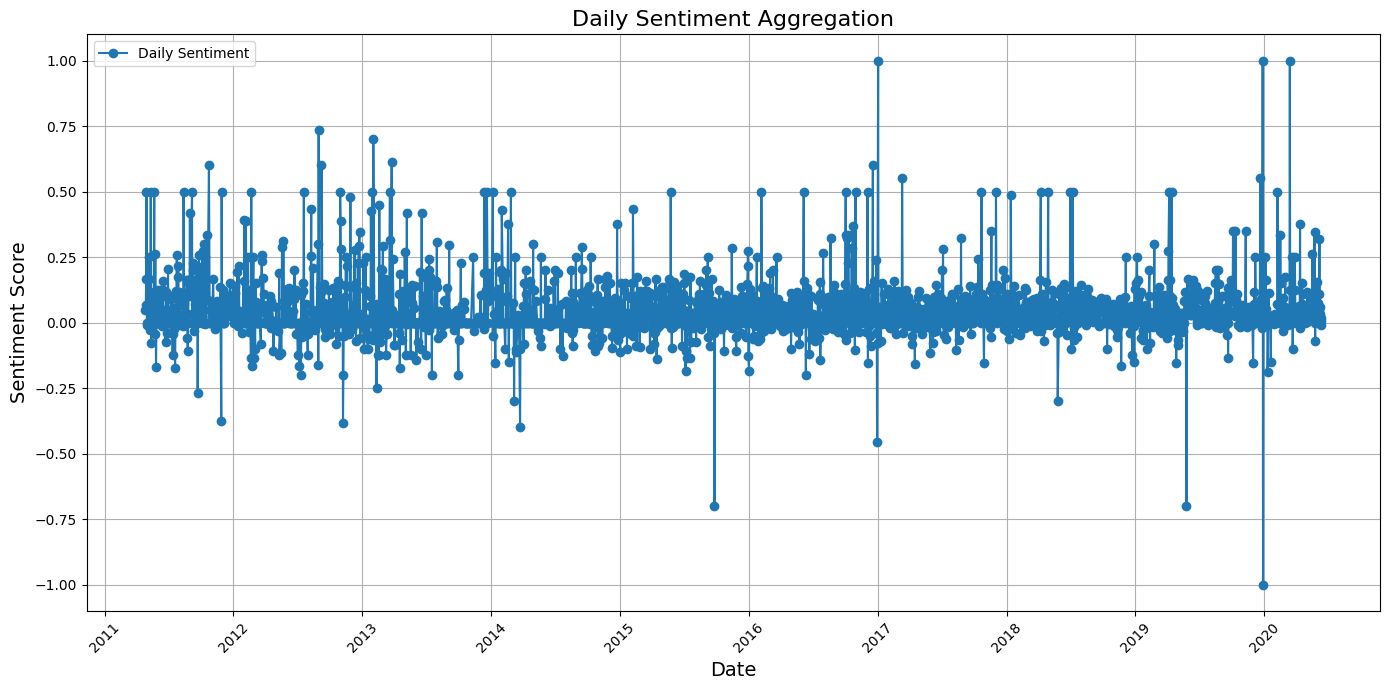

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(daily_sentiment['date'], daily_sentiment['Sentiment'], marker='o', label='Daily Sentiment')
plt.title('Daily Sentiment Aggregation', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()